# MEAN FILTER IMPLEMENTATION

## Overview
This notebook demonstrates **image smoothing using Mean Filter**. We'll implement the filter in two ways:
1. Using **OpenCV's built-in function** (fast and optimized)
2. Using **manual implementation with NumPy** (educational and transparent)

---

## Step 1: Import Required Libraries

We need three main libraries:
- **cv2 (OpenCV)**: For image loading and built-in filtering functions
- **numpy**: For manual convolution implementation and array operations
- **matplotlib**: For displaying images side by side

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
OpenCV version: 4.13.0
NumPy version: 2.1.3


## Step 2: Load and Prepare the Custom Images

### Important Note:
We're loading the custom noisy images: **noisy_1.jpg** and **noisy_2.jpg**

OpenCV loads images in **BGR format**, but Matplotlib expects **RGB format**. We need to convert BGR → RGB for correct color display.

In [ ]:
# Load the custom noisy images

image1_bgr = cv2.imread('noisy_1.jpg')
image2_bgr = cv2.imread('noisy_2.jpg')

# Convert BGR to RGB for Matplotlib
image1_rgb = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2RGB)

print(f"Image 1 shape (RGB): {image1_rgb.shape}")
print(f"Image 1 data type: {image1_rgb.dtype}")
print(f"\nImage 2 shape (RGB): {image2_rgb.shape}")
print(f"Image 2 data type: {image2_rgb.dtype}")

Image 1 shape (RGB): (148, 148, 3)
Image 1 data type: uint8

Image 2 shape (RGB): (133, 197, 3)
Image 2 data type: uint8


## Step 3: Convert to Grayscale

### Why convert to grayscale?
1. **Simplicity**: Easier to understand filtering on single-channel images
2. **Performance**: Faster processing (1 channel vs 3 channels)
3. **Clarity**: Better visualization of smoothing effects
4. **Educational**: Fundamental concept before applying to color images

### Grayscale Conversion Formula:
```
Gray = 0.299 × R + 0.587 × G + 0.114 × B
```
This weighted average accounts for human eye sensitivity to different colors.

Image 1 grayscale shape: (148, 148)
Image 1 grayscale data type: uint8

Image 2 grayscale shape: (133, 197)
Image 2 grayscale data type: uint8


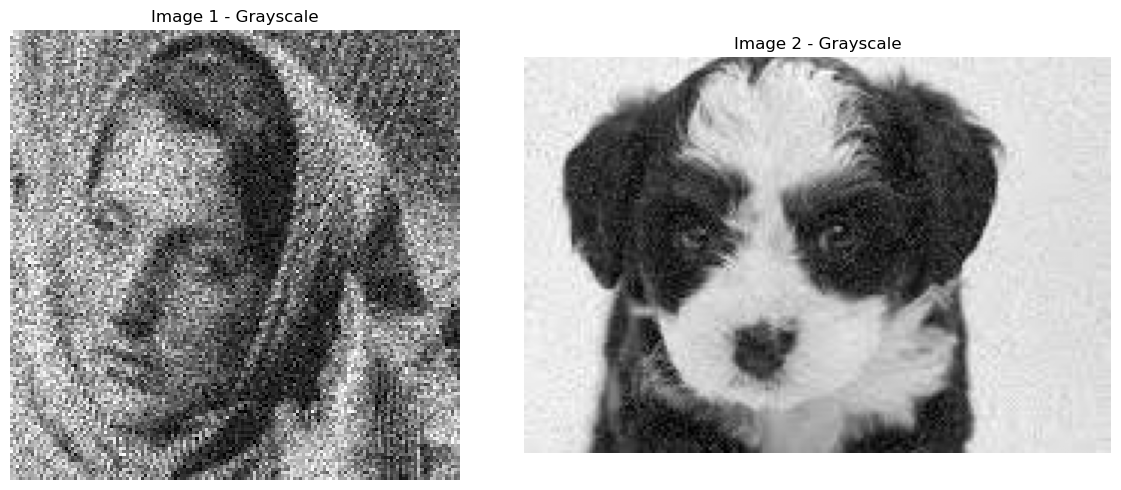

In [16]:
# Convert to grayscale
image1_gray = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2GRAY)

print(f"Image 1 grayscale shape: {image1_gray.shape}")
print(f"Image 1 grayscale data type: {image1_gray.dtype}")
print(f"\nImage 2 grayscale shape: {image2_gray.shape}")
print(f"Image 2 grayscale data type: {image2_gray.dtype}")

# Display the grayscale images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image1_gray, cmap='gray')
axes[0].set_title('Image 1 - Grayscale')
axes[0].axis('off')

axes[1].imshow(image2_gray, cmap='gray')
axes[1].set_title('Image 2 - Grayscale')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Step 4: Apply Mean Filter using OpenCV

### What is Mean Filter?
- **Averaging filter** that replaces each pixel with the average of its neighbors
- **Kernel size** determines the neighborhood (e.g., 3×3, 5×5)
- **Effect**: Smooths the image by reducing noise

### OpenCV's `cv2.blur()` function:
```python
cv2.blur(image, (kernel_width, kernel_height))
```

In [33]:
# Apply 3x3 mean filter
kernel_size_3 = 3
image1_blur_3x3 = cv2.blur(image1_gray, (kernel_size_3, kernel_size_3))
image2_blur_3x3 = cv2.blur(image2_gray, (kernel_size_3, kernel_size_3))

# Apply 5x5 mean filter
kernel_size_5 = 5
image1_blur_5x5 = cv2.blur(image1_gray, (kernel_size_5, kernel_size_5))
image2_blur_5x5 = cv2.blur(image2_gray, (kernel_size_5, kernel_size_5))

# Apply 7x7 mean filter
kernel_size_7 = 7
image1_blur_7x7 = cv2.blur(image1_gray, (kernel_size_7, kernel_size_7))
image2_blur_7x7 = cv2.blur(image2_gray, (kernel_size_7, kernel_size_7))

# Apply 9x9 mean filter
kernel_size_9 = 9
image1_blur_9x9 = cv2.blur(image1_gray, (kernel_size_9, kernel_size_9))
image2_blur_9x9 = cv2.blur(image2_gray, (kernel_size_9, kernel_size_9))

print(f"Applied {kernel_size_3}x{kernel_size_3} mean filter using cv2.blur()")
print(f"Applied {kernel_size_5}x{kernel_size_5} mean filter using cv2.blur()")
print(f"Applied {kernel_size_7}x{kernel_size_7} mean filter using cv2.blur()")
print(f"Applied {kernel_size_9}x{kernel_size_9} mean filter using cv2.blur()")

Applied 3x3 mean filter using cv2.blur()
Applied 5x5 mean filter using cv2.blur()
Applied 7x7 mean filter using cv2.blur()
Applied 9x9 mean filter using cv2.blur()


## Step 5: Manual Mean Filter Implementation

### How it works:
1. **Create kernel**: Matrix of equal weights (all 1/N where N = kernel size²)
2. **Pad image**: Add border pixels to handle edges
3. **Convolution**: Slide kernel over image, multiply and sum
4. **Output**: Filtered image with same dimensions as input

In [19]:
def apply_mean_filter_manual(image, kernel_size):
    """
    Manually apply mean filter using NumPy convolution
    
    Parameters:
    - image: Input grayscale image
    - kernel_size: Size of the mean filter kernel (e.g., 3 for 3x3)
    
    Returns:
    - filtered_image: Image after applying mean filter
    """
    # Create mean kernel (all values equal, sum = 1)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    kernel = kernel / (kernel_size * kernel_size)  # Normalize
    
    # Get image dimensions
    img_height, img_width = image.shape
    
    # Pad the image with edge values (replicate border pixels)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    
    # Create output image
    filtered_image = np.zeros_like(image, dtype=np.float32)
    
    # Apply convolution manually
    for i in range(img_height):
        for j in range(img_width):
            # Extract region of interest
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]
            # Apply kernel (element-wise multiplication and sum)
            filtered_value = np.sum(roi * kernel)
            filtered_image[i, j] = filtered_value
    
    # Convert back to uint8
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
    
    return filtered_image

# Apply manual mean filter to both images
# 3 x 3
print("Applying manual 3x3 mean filter to Image 1...")
image1_manual_3x3 = apply_mean_filter_manual(image1_gray, 3)
print("Applying manual 3x3 mean filter to Image 2...")
image2_manual_3x3 = apply_mean_filter_manual(image2_gray, 3)
print("Manual mean filter applied successfully!")

# 5 x 5
print("Applying manual 5x5 mean filter to Image 1...")
image1_manual_5x5 = apply_mean_filter_manual(image1_gray, 5)
print("Applying manual 5x5 mean filter to Image 2...")
image2_manual_5x5 = apply_mean_filter_manual(image2_gray, 5)
print("Manual mean filter applied successfully!")

# 7 x 7
print("Applying manual 7x7 mean filter to Image 1...")
image1_manual_7x7 = apply_mean_filter_manual(image1_gray, 7)
print("Applying manual 7x7 mean filter to Image 2...")
image2_manual_7x7 = apply_mean_filter_manual(image2_gray, 7)
print("Manual mean filter applied successfully!")

# 9 x 9
print("Applying manual 9x9 mean filter to Image 1...")
image1_manual_9x9 = apply_mean_filter_manual(image1_gray, 9)
print("Applying manual 9x9 mean filter to Image 2...")
image2_manual_9x9 = apply_mean_filter_manual(image2_gray, 9)
print("Manual mean filter applied successfully!")

Applying manual 3x3 mean filter to Image 1...
Applying manual 3x3 mean filter to Image 2...
Manual mean filter applied successfully!
Applying manual 5x5 mean filter to Image 1...
Applying manual 5x5 mean filter to Image 2...
Manual mean filter applied successfully!
Applying manual 7x7 mean filter to Image 1...
Applying manual 7x7 mean filter to Image 2...
Manual mean filter applied successfully!
Applying manual 9x9 mean filter to Image 1...
Applying manual 9x9 mean filter to Image 2...
Manual mean filter applied successfully!


## Step 6: Display Results - Image 1

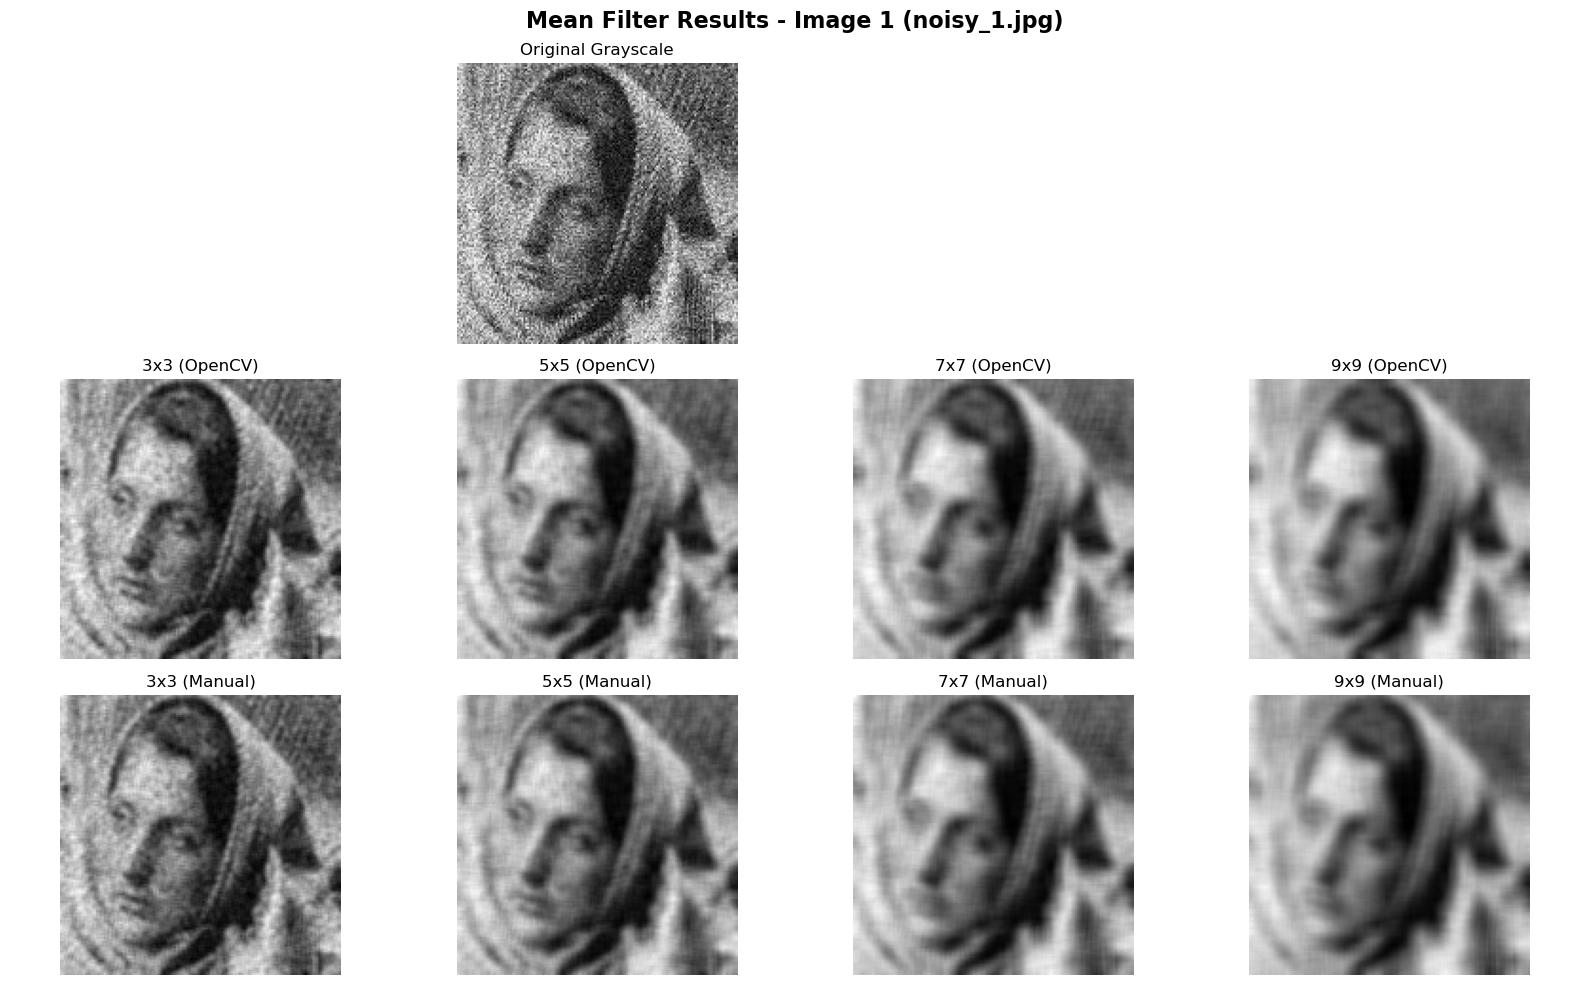

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle('Mean Filter Results - Image 1 (noisy_1.jpg)',
             fontsize=16, fontweight='bold')

for ax in axes.flatten():
    ax.axis('off')

# Original
axes[0, 1].imshow(image1_gray, cmap='gray')
axes[0, 1].set_title('Original Grayscale')

# OpenCV
axes[1, 0].imshow(image1_blur_3x3, cmap='gray')
axes[1, 0].set_title('3x3 (OpenCV)')

axes[1, 1].imshow(image1_blur_5x5, cmap='gray')
axes[1, 1].set_title('5x5 (OpenCV)')

axes[1, 2].imshow(image1_blur_7x7, cmap='gray')
axes[1, 2].set_title('7x7 (OpenCV)')

axes[1, 3].imshow(image1_blur_9x9, cmap='gray')
axes[1, 3].set_title('9x9 (OpenCV)')

# Manual
axes[2, 0].imshow(image1_manual_3x3, cmap='gray')
axes[2, 0].set_title('3x3 (Manual)')

axes[2, 1].imshow(image1_manual_5x5, cmap='gray')
axes[2, 1].set_title('5x5 (Manual)')

axes[2, 2].imshow(image1_manual_7x7, cmap='gray')
axes[2, 2].set_title('7x7 (Manual)')

axes[2, 3].imshow(image1_manual_9x9, cmap='gray')
axes[2, 3].set_title('9x9 (Manual)')

plt.tight_layout()
plt.show()


## Step 7: Display Results - Image 2

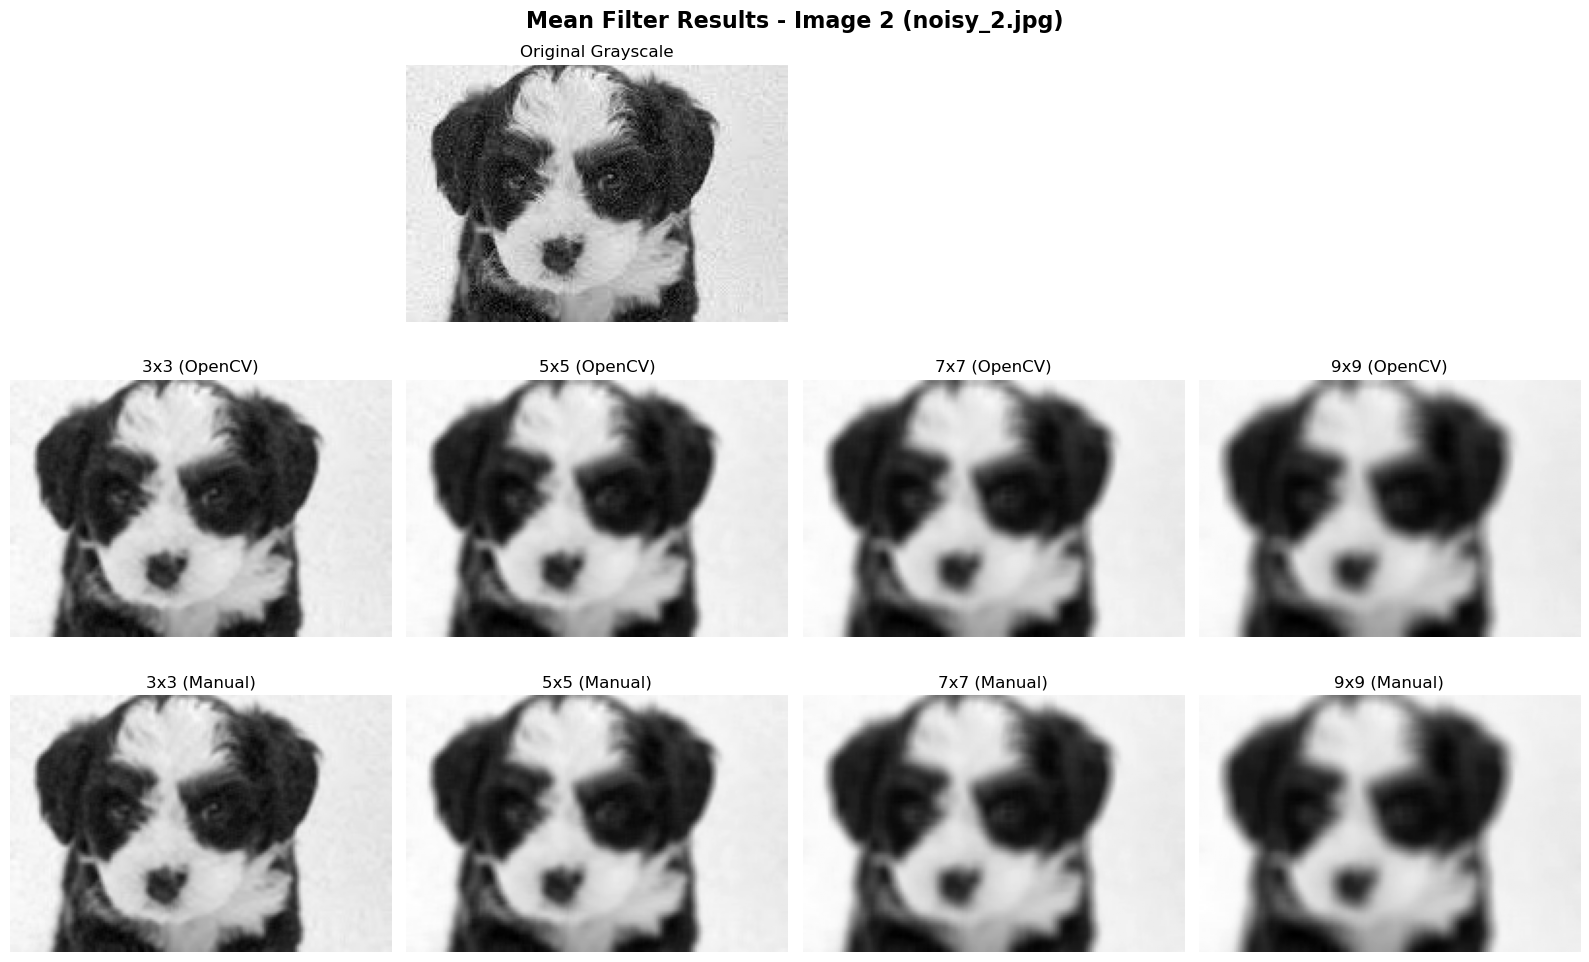

In [35]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle('Mean Filter Results - Image 2 (noisy_2.jpg)',
             fontsize=16, fontweight='bold')

for ax in axes.flatten():
    ax.axis('off')

# Original
axes[0, 1].imshow(image2_gray, cmap='gray')
axes[0, 1].set_title('Original Grayscale')

# OpenCV
axes[1, 0].imshow(image2_blur_3x3, cmap='gray')
axes[1, 0].set_title('3x3 (OpenCV)')

axes[1, 1].imshow(image2_blur_5x5, cmap='gray')
axes[1, 1].set_title('5x5 (OpenCV)')

axes[1, 2].imshow(image2_blur_7x7, cmap='gray')
axes[1, 2].set_title('7x7 (OpenCV)')

axes[1, 3].imshow(image2_blur_9x9, cmap='gray')
axes[1, 3].set_title('9x9 (OpenCV)')

# Manual
axes[2, 0].imshow(image2_manual_3x3, cmap='gray')
axes[2, 0].set_title('3x3 (Manual)')

axes[2, 1].imshow(image2_manual_5x5, cmap='gray')
axes[2, 1].set_title('5x5 (Manual)')

axes[2, 2].imshow(image2_manual_7x7, cmap='gray')
axes[2, 2].set_title('7x7 (Manual)')

axes[2, 3].imshow(image2_manual_9x9, cmap='gray')
axes[2, 3].set_title('9x9 (Manual)')

plt.tight_layout()
plt.show()


## Step 8: Compare OpenCV vs Manual Implementation

In [41]:
# absolute differences for all kernel sizes
diff1_3 = cv2.absdiff(image1_blur_3x3, image1_manual_3x3)
diff1_5 = cv2.absdiff(image1_blur_5x5, image1_manual_5x5)
diff1_7 = cv2.absdiff(image1_blur_7x7, image1_manual_7x7)
diff1_9 = cv2.absdiff(image1_blur_9x9, image1_manual_9x9)

diff2_3 = cv2.absdiff(image2_blur_3x3, image2_manual_3x3)
diff2_5 = cv2.absdiff(image2_blur_5x5, image2_manual_5x5)
diff2_7 = cv2.absdiff(image2_blur_7x7, image2_manual_7x7)
diff2_9 = cv2.absdiff(image2_blur_9x9, image2_manual_9x9)

print("="*70)
print("COMPARING OpenCV TO MANUAL IMPLEMENTATION")
print("="*70)

# Image 1
print("\nImage 1 Differences:")
for k, diff in zip([3,5,7,9], [diff1_3, diff1_5, diff1_7, diff1_9]):
    print(f"{k}x{k} - Max diff: {np.max(diff)}, Mean diff: {np.mean(diff):.4f}")

# Image 2
print("\nImage 2 Differences:")
for k, diff in zip([3,5,7,9], [diff2_3, diff2_5, diff2_7, diff2_9]):
    print(f"{k}x{k} - Max diff: {np.max(diff)}, Mean diff: {np.mean(diff):.4f}")

# Check for perfect match
if all(np.max(d) == 0 for d in [diff1_3, diff1_5, diff1_7, diff1_9,
                                diff2_3, diff2_5, diff2_7, diff2_9]):
    print("\nPerfect match: All OpenCV and manual implementations are identical.")
else:
    print("\nVery close match: Minor differences due to numerical precision.")

COMPARING OpenCV TO MANUAL IMPLEMENTATION

Image 1 Differences:
3x3 - Max diff: 29, Mean diff: 0.6111
5x5 - Max diff: 34, Mean diff: 0.7400
7x7 - Max diff: 31, Mean diff: 0.8125
9x9 - Max diff: 32, Mean diff: 0.8660

Image 2 Differences:
3x3 - Max diff: 28, Mean diff: 0.4919
5x5 - Max diff: 33, Mean diff: 0.5544
7x7 - Max diff: 31, Mean diff: 0.5808
9x9 - Max diff: 35, Mean diff: 0.6141

Very close match: Minor differences due to numerical precision.


## Summary

### Key Observations:
1. Mean filter effectively reduces noise in both custom images
2. Larger kernel size (5×5, 7x7, 9x9) produces more smoothing than smaller (3×3)
3. OpenCV and manual implementations produce nearly identical results
4. **Trade-off**: More smoothing = More blur (loss of detail)

### Next Steps:
- Apply to color images (process each RGB channel)
- Measure performance difference between OpenCV and manual implementation